- With this Mnist it is equivalent to Hello World Program
- There is a major difference between a traditional programming and deep learning programming, in this deep learning program a user gives the images the model is trained and describes the rules for it
- Mnist data has 70,000 grayscaled images of 0-9
- Difference of test data and validation data
> Steps Performed :
> 1. Flattening the image to a shape of (784,)
> 2. Normalizing the data
> 3. Categorize the label

The sequential and Dense model was created using:
<br>
`from tf.keras.models import Sequential`
<br>
`from tf.keras.layers import Dense`
 - I also found the difference between the loss and val_loss



In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(x_train , y_train ), (x_valid , y_valid) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


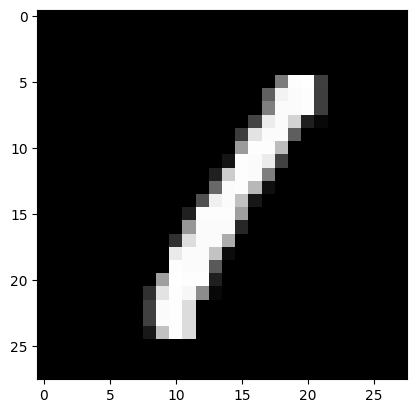

In [4]:
import matplotlib.pyplot as plt
plt.imshow(x_train[3],cmap='gray')

In [5]:
x_train.max()

255

In [6]:
#Flatten the data
x_train = x_train.reshape(x_train.shape[0],784) 
x_valid = x_valid.reshape(x_valid.shape[0],784) 

In [7]:
x_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [8]:
#Normalize the data
x_train = x_train/x_train.max()
x_valid = x_valid/x_valid.max()

In [9]:
x_valid.max()

1.0

In [10]:
#Categorical Encoding
from tensorflow import keras
number_of_categories = 10
y_train = keras.utils.to_categorical(y_train , number_of_categories)
y_valid = keras.utils.to_categorical(y_valid, number_of_categories)

In [11]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

# Now that we are ready let's construct the model
- the input layer is densely connected with neurons =512 activation_function = 'relu' and input shape = 784
- hidden layer also has the neurons of 512
- output layer has to figure out from 1 to 10 possible categorie (0 to 9)
## summary is found about the model
> Then we compile the model
> - loss is calculated using categorical_crossentropy 
> - and the accuracy is also tracked down
## Fitting to the model



In [12]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [13]:
#Model construction
model = Sequential()
model.add(Dense(units = 500 , activation = 'relu',input_shape = (784,)))
model.add(Dense(units = 500 , activation = 'relu'))
model.add(Dense(units = 10 , activation = 'softmax'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               392500    
                                                                 
 dense_1 (Dense)             (None, 500)               250500    
                                                                 
 dense_2 (Dense)             (None, 10)                5010      
                                                                 
Total params: 648,010
Trainable params: 648,010
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(loss='categorical_crossentropy',metrics =['accuracy'])

In [16]:
model.fit(x_train,y_train,epochs = 5, validation_data=(x_valid,y_valid))

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1923 - accuracy: 0.9429 - val_loss: 0.1077 - val_accuracy: 0.9709
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0992 - accuracy: 0.9740 - val_loss: 0.1027 - val_accuracy: 0.9746
Epoch 3/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0832 - accuracy: 0.9795 - val_loss: 0.1080 - val_accuracy: 0.9763
Epoch 4/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0721 - accuracy: 0.9835 - val_loss: 0.1262 - val_accuracy: 0.9785
Epoch 5/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0639 - accuracy: 0.9859 - val_loss: 0.1393 - val_accuracy: 0.9816


In [17]:
#EXCERCISE

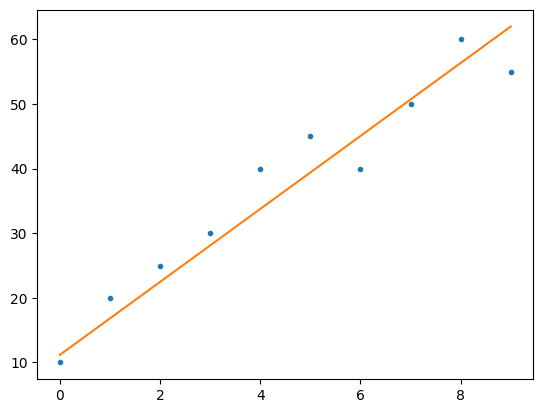

5.644079173181529
Loss: 17.99220451389949


In [18]:
import numpy as np
from numpy.polynomial.polynomial import polyfit
import matplotlib.pyplot as plt

m = 1  # -2 to start, change me please
b = 0  # 40 to start, change me please

# Sample data
x = np.array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9])
y = np.array([10, 20, 25, 30, 40, 45, 40, 50, 60, 55])
epochs = 10000
n = len(x)
learning_rate = 0.0005
for i in range(epochs):
    
    
    y_hat = x * m + b
    md = np.sum(x*(y_hat-y))/n
    m = m - learning_rate *md
    bd = np.sum((y_hat-y))/n
    b = b - learning_rate* bd
plt.plot(x, y, '.')
plt.plot(x, y_hat, '-')
plt.show()

print(m)
print("Loss:", np.sum((y - y_hat)**2)/len(x))